## Data Cleaning 

You'll notice that this dataset is by no means ready for analysis. We have:

* a numeric column interpreted as a string
* extra columns that are not relevant to our analysis
* multiple rows with missing values
* column names are too long

Let's "clean" our dataset by fixing these errors below.

In [2]:
# import required modules for this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# TODO: load in excel file "../../data/raw/realestate.xlsx"
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
df = pd.read_excel("../../data/raw/realestate.xlsx")

# check how many missing values we have
df.isna().sum()

No                                         0
X2 house age                              11
X3 distance to the nearest MRT station     0
X4 number of convenience stores            1
X5 latitude                                0
X6 longitude                               0
Y house price of unit area                 0
dtype: int64

In [4]:
# create dictionary of mappings
rename_dict = {
    "X2 house age": "house_age", 
    "X3 distance to the nearest MRT station": "distance_to_mrt", 
    "X4 number of convenience stores": "num_convenience_stores",
    "X5 latitude": "lat",
    "X6 longitude": "long",
    "Y house price of unit area": "price_unit_area"
}

# rename columns
df_rename = df.rename(columns=rename_dict)

# view new columns
df_rename.columns

Index(['No', 'house_age', 'distance_to_mrt', 'num_convenience_stores', 'lat',
       'long', 'price_unit_area'],
      dtype='object')

In [5]:
selected = ["lat", "long", "No"]

# TODO: Drop the selected columns 
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df_drop = df_rename.drop(columns=selected)
print(df_drop)

     house_age distance_to_mrt  num_convenience_stores  price_unit_area
0         32.0      "84.87882"                   100.0             37.9
1         19.5      "306.5947"                     9.0             42.2
2         13.3      "561.9845"                     5.0             47.3
3         13.3      "561.9845"                     5.0             54.8
4          5.0      "390.5684"                     5.0             43.1
..         ...             ...                     ...              ...
409       13.7      "4082.015"                     0.0             15.4
410        5.6      "90.45606"                     9.0             50.0
411       18.8      "390.9696"                     7.0             40.6
412        8.1      "104.8101"                     5.0             52.5
413        6.5      "90.45606"                     9.0             63.9

[414 rows x 4 columns]


In [37]:
# remove quotes from sample
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].str.strip("\"")

# TODO: convert the "distance_to_mrt" column to the "float" datatype
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
df_drop["distance_to_mrt"] = df_drop["distance_to_mrt"].astype(float)
df_drop["distance_to_mrt"]


KeyError: 'distance_to_mrt'

In [15]:
# check current "shape" of dataframe
df_drop.shape

(414, 4)

In [59]:
# TODO: Remove missing values from this dataframe
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html
df_drop = df_drop.dropna() 

# check shape again
df_drop.shape

(403, 7)

## Explore Again

Now that we've cleaned our dataset, let's again explore the relationships & distributions of our dataset. 

Perhaps we missed something "qualitative" about our data that we should remove. 

In [50]:
# TODO: print out the summary statistics (mean, median, max, min, count) of all numeric columns
# documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
df_drop.describe()

,No,house_age,num_convenience_stores,lat,long,price_unit_area
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000
mean,206.987593,18.607196,4.292804,24.969040,121.533590,38.106452
std,118.267962,22.656541,5.636027,0.012365,0.015250,13.610588
min,1.000000,0.000000,-6.000000,24.932070,121.473530,7.600000
25%,105.500000,8.700000,1.000000,24.963010,121.529665,27.700000
50%,208.000000,16.100000,4.000000,24.971100,121.538740,38.600000
75%,308.500000,28.300000,6.000000,24.977440,121.543395,46.600000
max,414.000000,410.300000,100.000000,25.014590,121.566270,117.500000


In [51]:
# notice how the minimum value for "num_convenience_stores" is -6
# how do we have -6 convenience stores? this must be an error, let's remove it

df_outl = df_drop[df_drop.num_convenience_stores >= 0]
df_outl.shape

(402, 7)

In [52]:
# notice how the maximum value for "num_convenience_stores" is 100
# (the median convenice stores is 4, the mean is 4.29, this shows that this is most likely an error)

# TODO: implement this logic in the brackets
# documentation: https://pandas.pydata.org/docs/user_guide/indexing.html#boolean-indexing
df_outl = df_outl[df_outl.num_convenience_stores != 100.0]
df_outl.shape

(401, 7)

In [53]:
# notice how the maximum "house_age" is 410.3 years old 
# not looking at statistics, the oldest house in Taiwan was built in the 17th century (300 years at most)
# let's remove this value
df_outl = df_outl[df_outl.house_age != 410.3]
df_outl.shape

(400, 7)

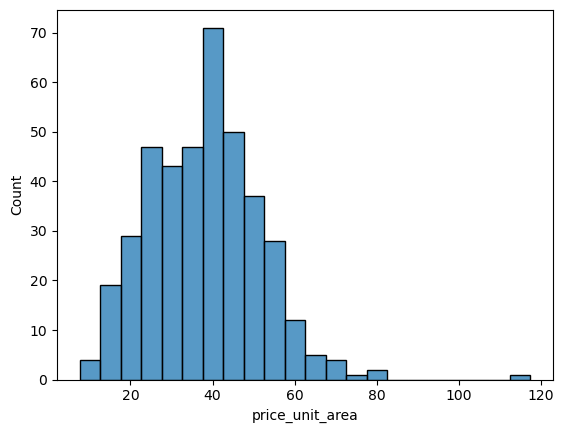

In [60]:
# let's explore our visualizations again, starting with univariate

# TODO : plot histogram of "price_unit_area" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["price_unit_area"])
plt.show()

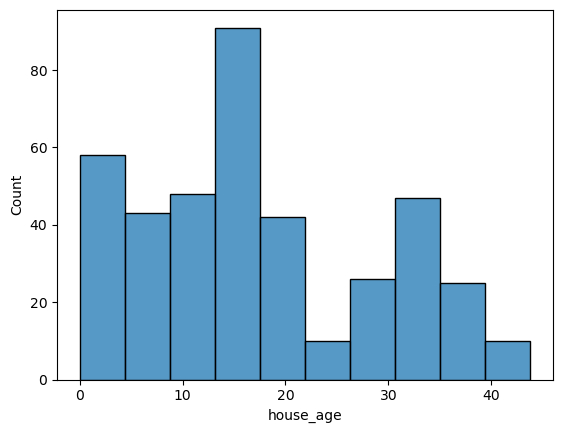

In [62]:
# TODO : plot histogram of "house_age" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.htmlsns.histplot(df_outl["house_age"])
sns.histplot(df_outl["house_age"])
plt.show()

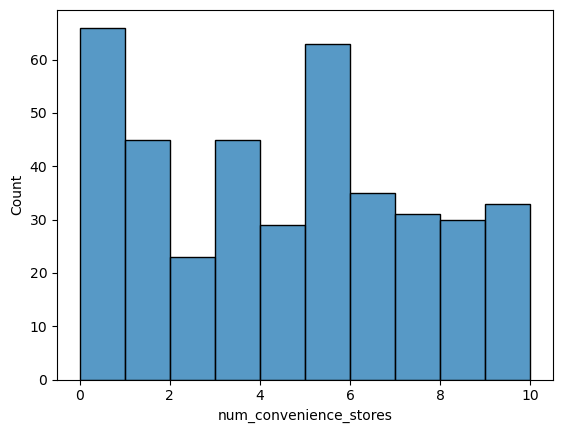

In [63]:
# TODO : plot histogram of "num_convenience_stores" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["num_convenience_stores"])
plt.show()

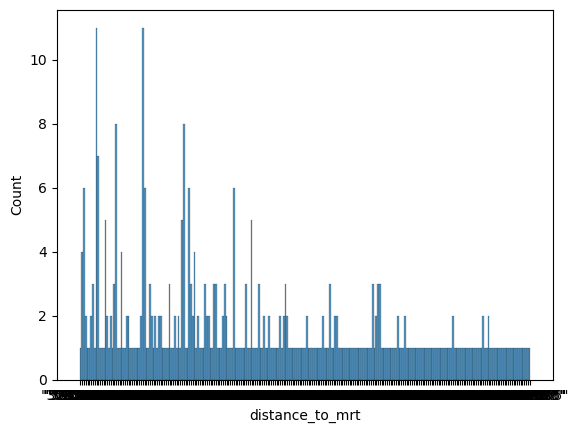

In [64]:
# TODO : plot histogram of "distance_to_mrt" using sns here
# documentation: https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(df_outl["distance_to_mrt"])
plt.show()

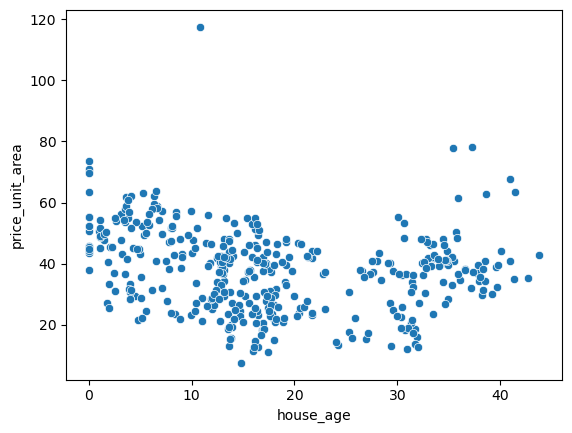

In [65]:
# next we move onto scatter-plots (bi-variate analysis)

# TODO : plot scatter plot of "house_age" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="house_age", y="price_unit_area")
plt.show()

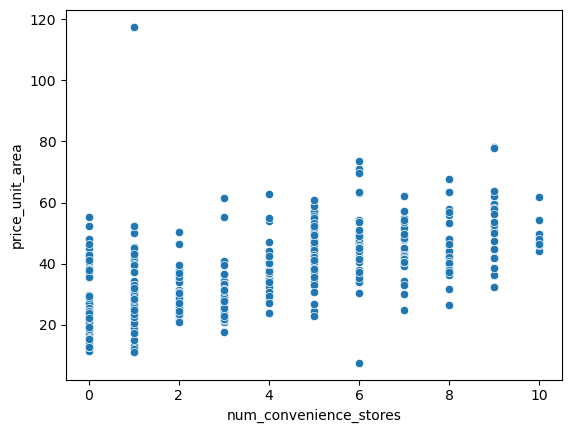

In [66]:
# TODO : plot scatter plot of "num_convenice_stores" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="num_convenience_stores", y="price_unit_area")
plt.show()

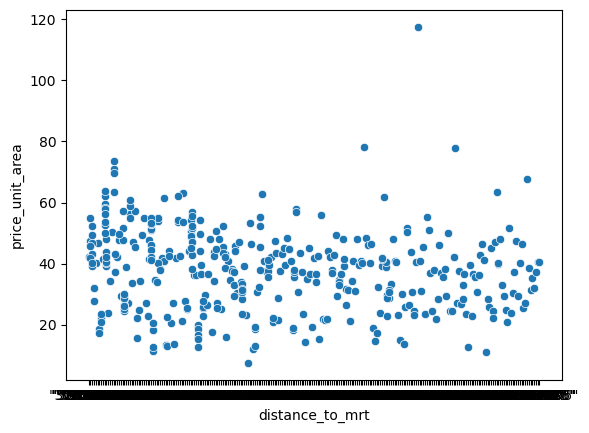

In [67]:
# TODO : plot scatter plot of "distance_to_mrt" and "price_unit_area"
# documentation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_outl, x="distance_to_mrt", y="price_unit_area")
plt.show()

In [70]:
mask = np.triu(np.ones_like(df_outl.corr(), dtype=bool))

sns.heatmap(df_outl.corr(), annot=True, mask=mask)
plt.show()

ValueError: could not convert string to float: '"306.5947"'

In [69]:
# save data for later modeling
df_drop.to_csv("../../data/processed/tpdata.csv", index=False)